In [0]:
#importando a Biblioteca Pandas
import pandas as pd

In [0]:
#Buscando a uri com formato csv
uri_filmes = "https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv"
filmes = pd.read_csv(uri_filmes)
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
#Renomeando as colunas da tabela
filmes.columns = ['filme_id', 'titulo', 'generos']
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
#Separação de genêros por coluna
generos = filmes.generos.str.get_dummies()
generos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#Junção de dataframe (concatenar)
dados_dos_filmes = pd.concat([filmes, generos], axis =1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#Importando Escalador de Preprocessamento para os generos (float - ponto flutuante)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [0]:
generos_escalados.shape

(9742, 20)

In [0]:
#Agrupamento (Clusterização)
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=3)

modelo.fit(generos_escalados)
print(f'Grupos {modelo.labels_}')

Grupos [2 2 1 ... 1 2 1]


In [0]:
print(generos)
print(modelo.cluster_centers_)

      (no genres listed)  Action  Adventure  ...  Thriller  War  Western
0                      0       0          1  ...         0    0        0
1                      0       0          1  ...         0    0        0
2                      0       0          0  ...         0    0        0
3                      0       0          0  ...         0    0        0
4                      0       0          0  ...         0    0        0
...                  ...     ...        ...  ...       ...  ...      ...
9737                   0       1          0  ...         0    0        0
9738                   0       0          0  ...         0    0        0
9739                   0       0          0  ...         0    0        0
9740                   0       1          0  ...         0    0        0
9741                   0       0          0  ...         0    0        0

[9742 rows x 20 columns]
[[-5.91799474e-02  8.33471290e-01  2.10058439e-01 -2.30351738e-01
  -2.67725966e-01 -5.65645897e-0

In [0]:
#Centralizando dados (aproximação por pontuação)
grupos = pd.DataFrame(modelo.cluster_centers_,
             columns=generos.columns)
grupos.transpose() #trasnpose, linha virou coluna, coluna virou linha

,0,1,2
(no genres listed),-0.059180,0.038903,-0.059180
Action,0.833471,-0.406095,-0.042063
Adventure,0.210058,-0.248192,0.889895
Animation,-0.230352,-0.252364,2.262794
Children,-0.267726,-0.270451,2.488792
Comedy,-0.565646,0.243189,0.228675
Crime,0.487743,-0.188724,-0.326671
Documentary,-0.215836,0.139693,-0.202315
Drama,-0.093615,0.142230,-0.591829
Fantasy,-0.002345,-0.140513,0.874751


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd012885c88>,
      dtype=object)

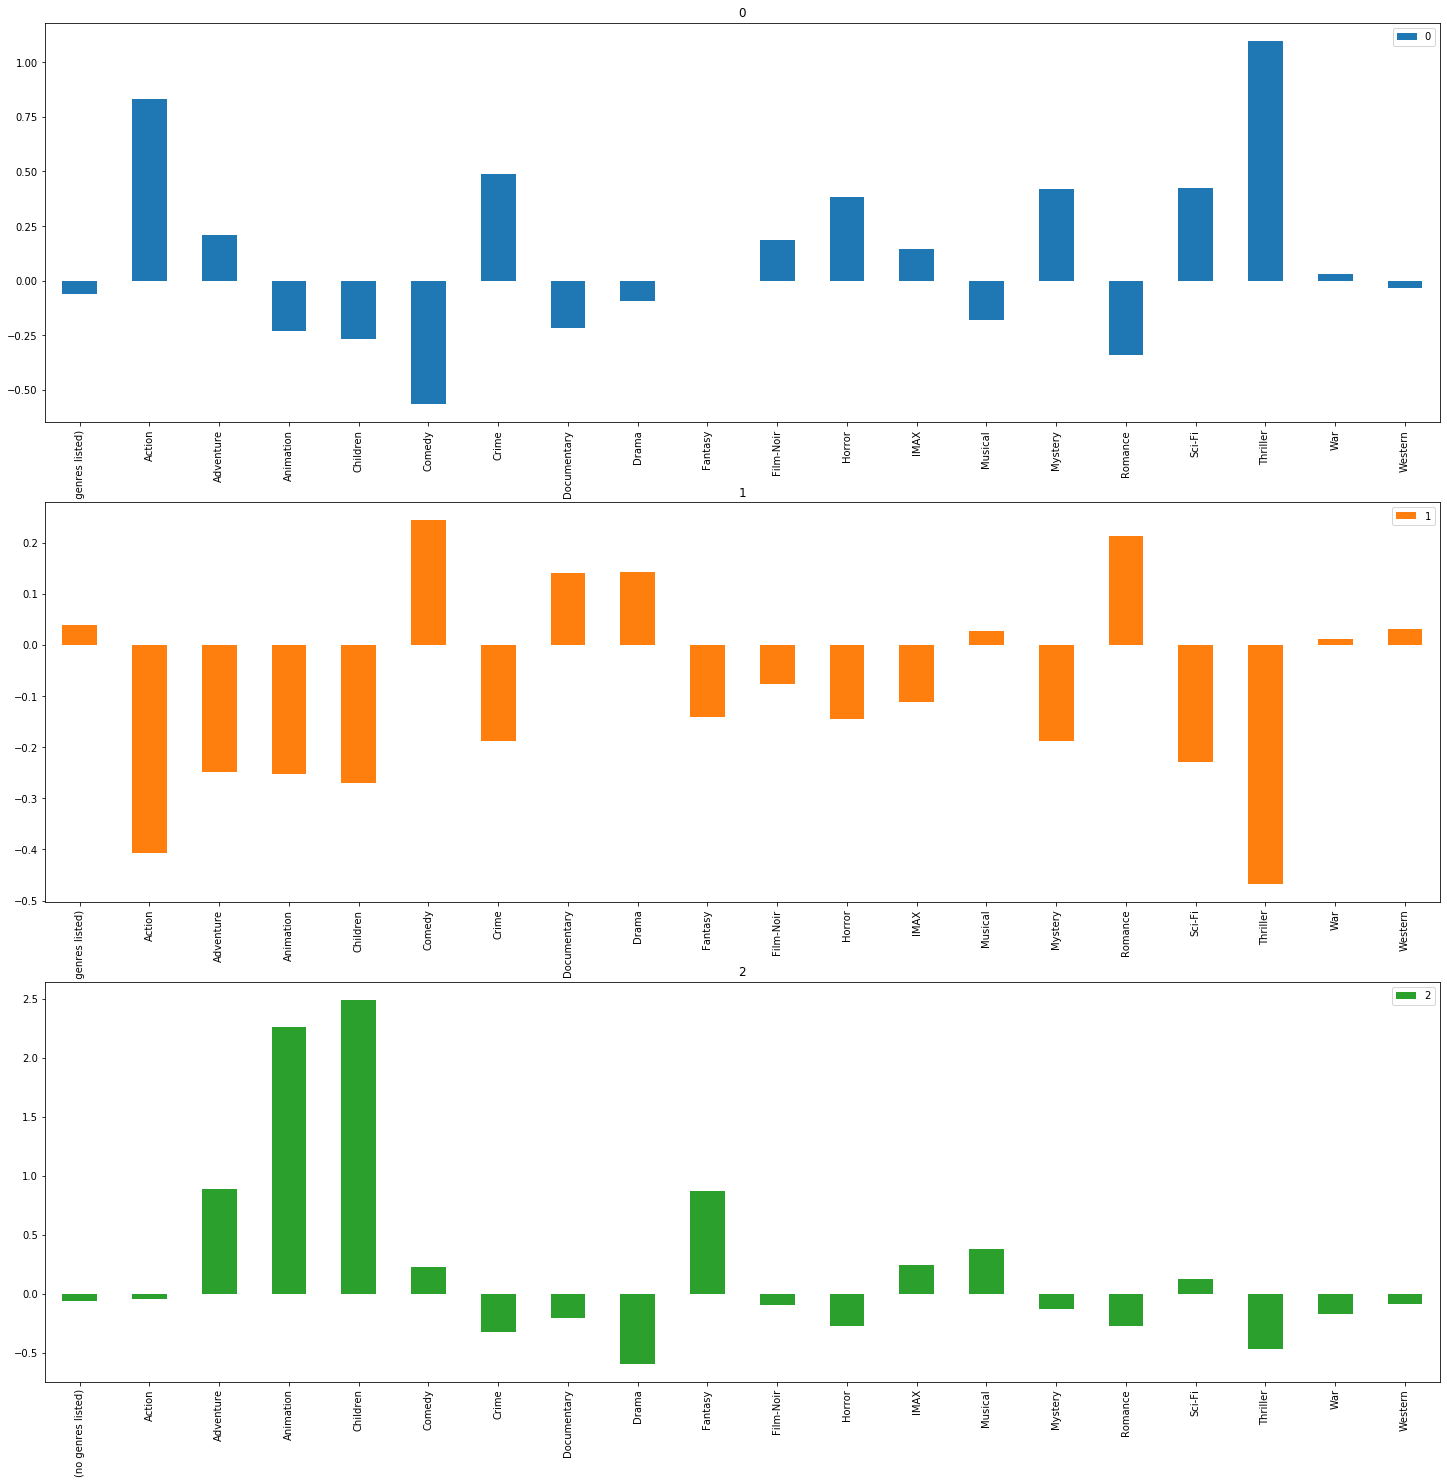

In [0]:
#Plot gráfico por grupo, pelo tanto de grupo definido anteriormente, no caso 3
grupos.transpose().plot.bar(subplots=True,
                figsize=(25,25),
                sharex=False)

In [0]:
#Prova de conceito, Filme infantil, recomenda filme infantil
#Definindo um filtro por grupo e reduzindo para somente 10 filmes para melhor visualização
grupo = 0

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
9150,147382,Doctor Who: Voyage Of The Damned (2007),Action|Sci-Fi,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1119,1459,Absolute Power (1997),Mystery|Thriller,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
7700,89840,Killer Elite (2011),Action|Thriller,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0
2252,2989,For Your Eyes Only (1981),Action|Adventure|Thriller,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1790,2389,Psycho (1998),Crime|Horror|Thriller,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3321,4496,D.O.A. (1988),Film-Noir|Mystery|Thriller,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
400,459,"Getaway, The (1994)",Action|Adventure|Crime|Drama|Romance|Thriller,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
3643,5007,Topkapi (1964),Adventure|Comedy|Thriller,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4795,7143,"Last Samurai, The (2003)",Action|Adventure|Drama|War,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [0]:
from sklearn.manifold import TSNE

In [0]:
#Dados em duas dimensões (redu~]ao de dimensões)
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-69.09524   , -11.045552  ],
       [-54.29471   ,  -8.804407  ],
       [  6.9168077 ,  25.433008  ],
       ...,
       [ 32.11709   ,   5.570869  ],
       [-12.465255  , -69.134476  ],
       [ -5.9529295 ,  -0.17550355]], dtype=float32)

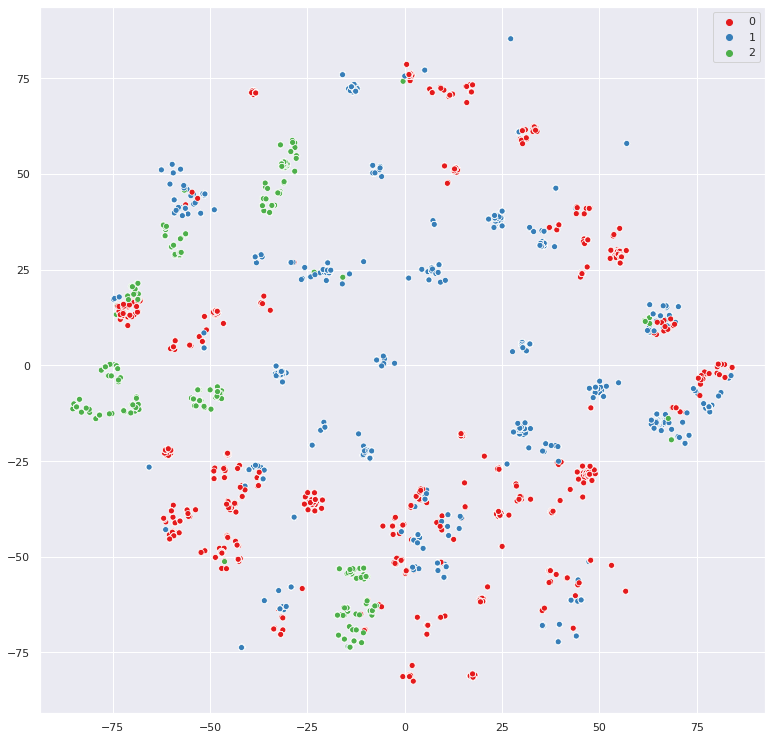

In [0]:
import seaborn as sns

sns.set(rc={'figure.figsize' : (13, 13)}) #tamanho da visualização

sns.scatterplot(x =visualizacao[:,0],
                y=visualizacao[:, 1],
                hue=modelo.labels_,
                palette=sns.color_palette('Set1', 3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd00ce45860>,
      dtype=object)

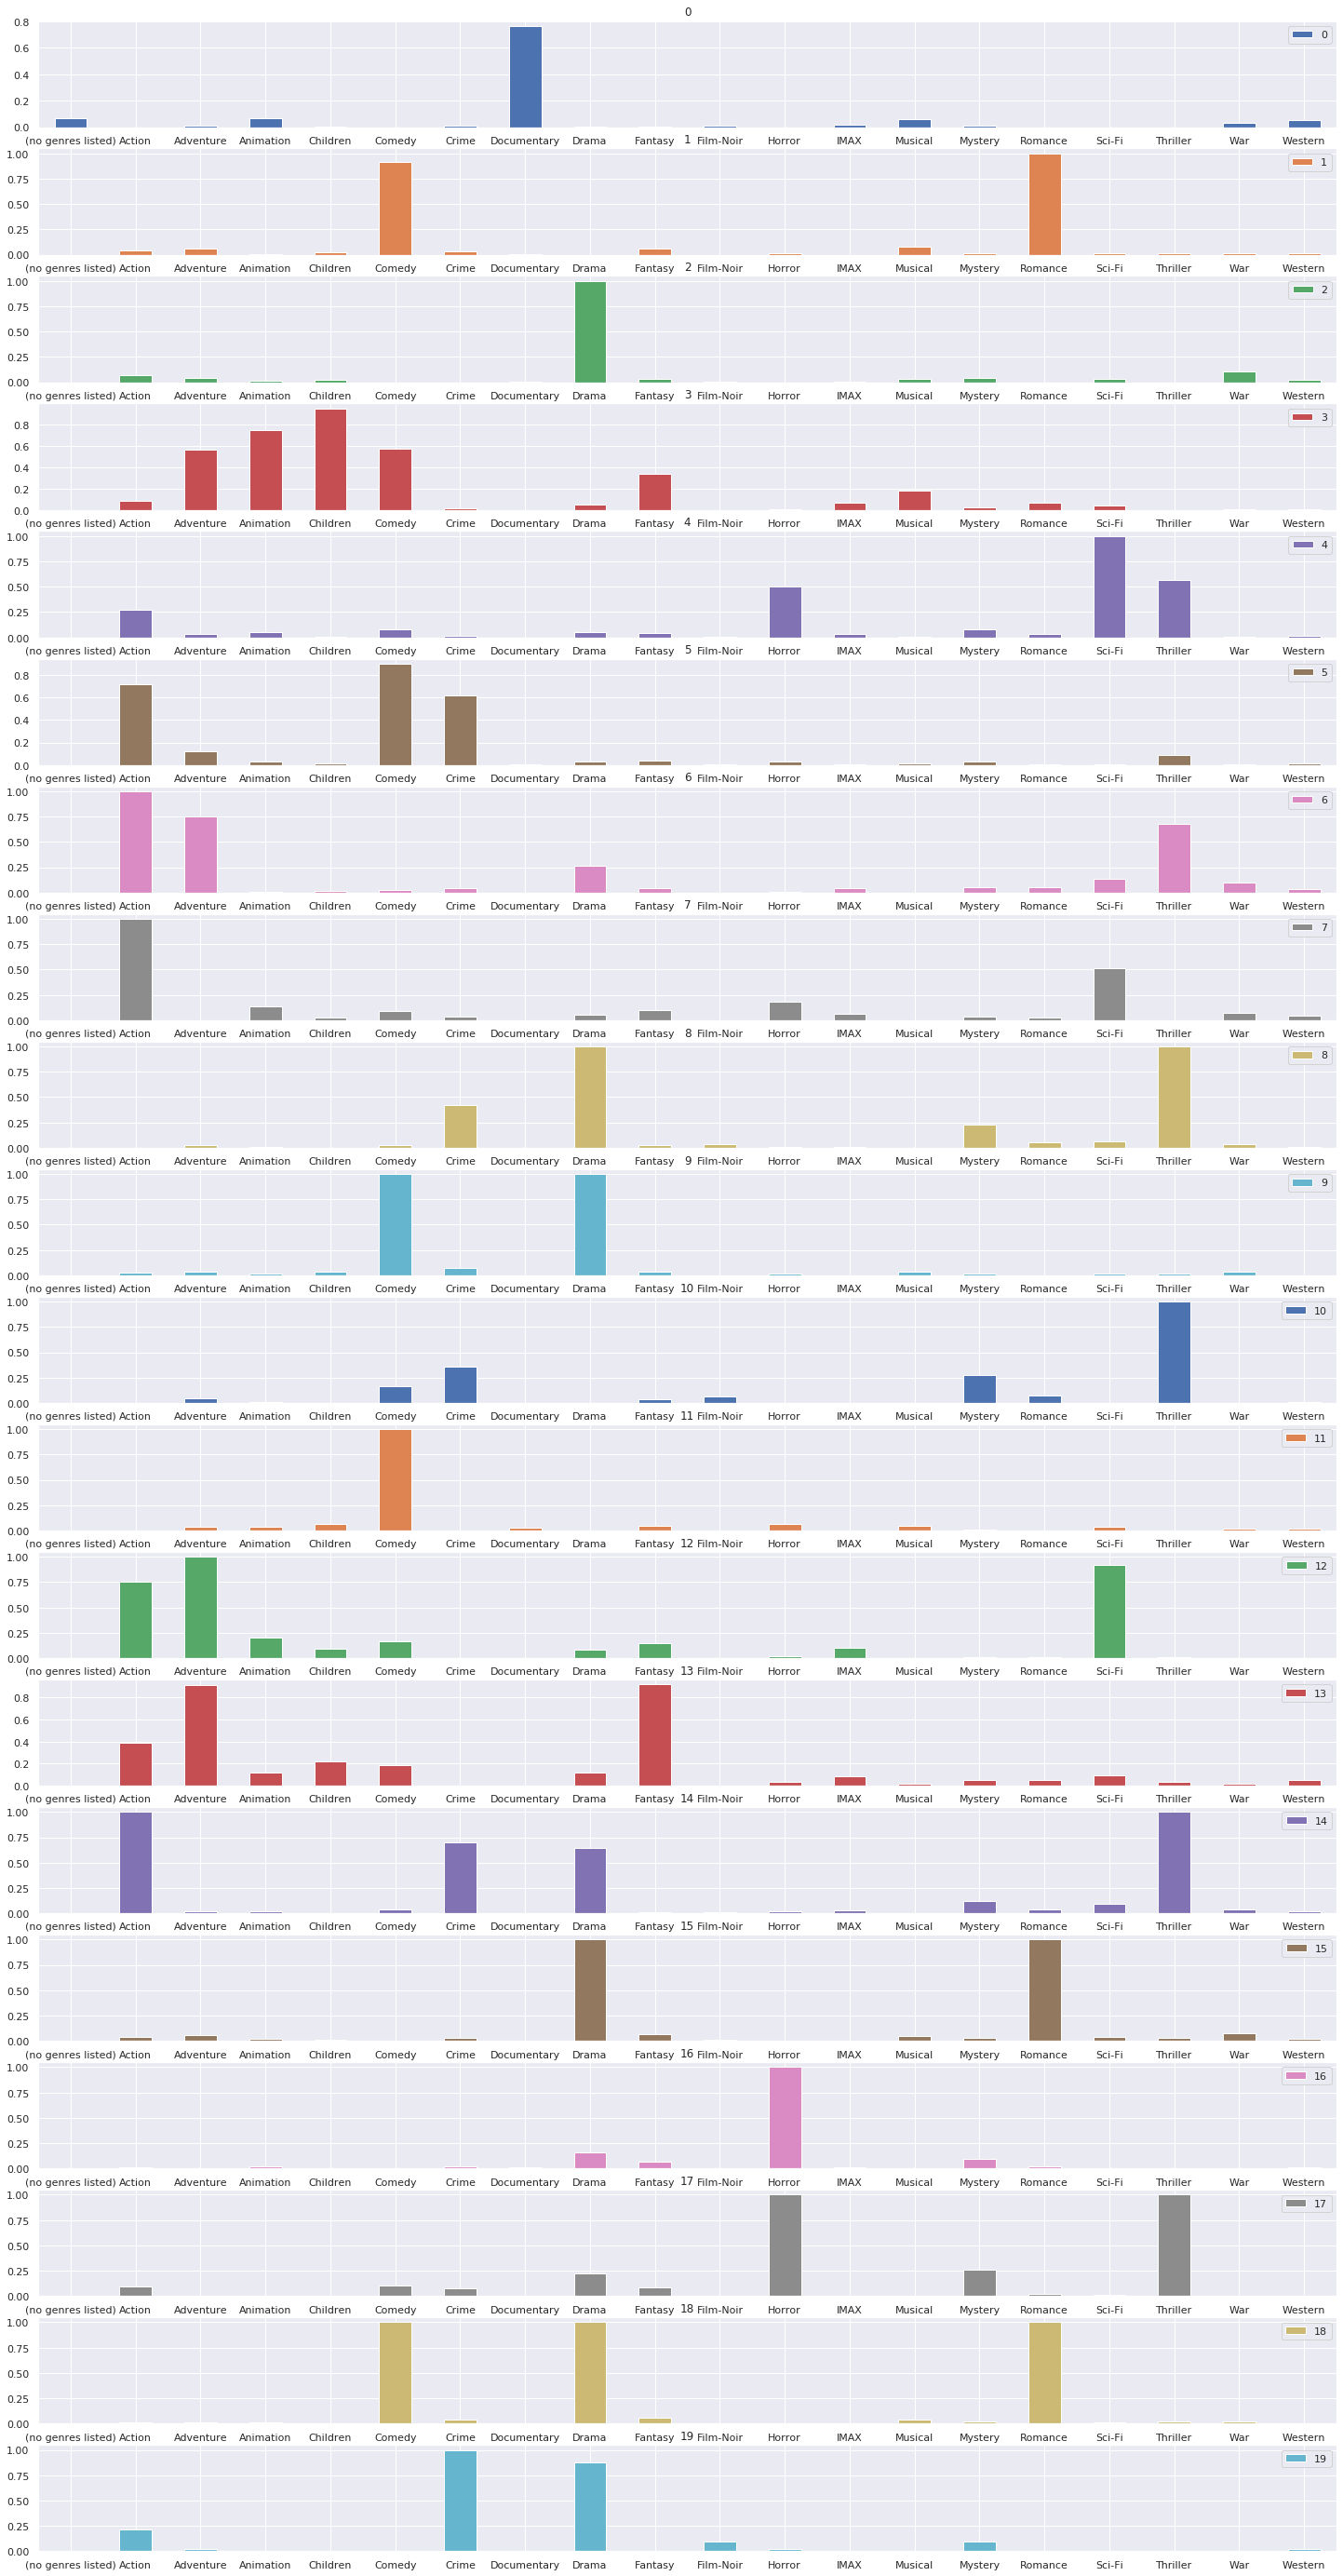

In [0]:
#Trabalahando com 20 dimensões
modelo = KMeans (n_clusters=20)
modelo.fit(generos)
grupos = pd.DataFrame(modelo.cluster_centers_,
             columns=generos.columns)
grupos.transpose().plot.bar(subplots=True,
                figsize=(25,50),
                sharex=False,
                rot=0)

In [0]:
grupo = 2

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
298,340,"War, The (1994)",Adventure|Drama|War,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
5008,7753,Tuesdays with Morrie (1999),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2544,3405,"Night to Remember, A (1958)",Action|Drama,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7791,91976,"Grey, The (2012)",Action|Drama,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6321,48598,Infamous (2006),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2277,3020,Falling Down (1993),Action|Drama,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9225,152085,Desierto (2016),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1000,1302,Field of Dreams (1989),Children|Drama|Fantasy,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
5334,8873,"Motorcycle Diaries, The (Diarios de motociclet...",Adventure|Drama,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8584,117192,Doctor Who: The Time of the Doctor (2013),Adventure|Drama,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#Como saber quantas dimensões escolher
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return  [numero_de_clusters, modelo.inertia_]

In [0]:
#Erro médio²
kmeans(20, generos_escalados)

[20, 55087.35734345667]

In [0]:
#Cotovelo = Elbow Method
kmeans(3, generos_escalados)

[3, 166438.84739512784]

In [0]:
#Taxa de erro
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)] #de 1 a 40 - exclusive
resultado

[[1, 194840.0],
 [2, 179523.44396124873],
 [3, 166516.8100457482],
 [4, 158240.73503976455],
 [5, 147737.96072040184],
 [6, 137264.3866738304],
 [7, 128873.50465974025],
 [8, 119394.95954736469],
 [9, 110221.34964660656],
 [10, 102253.85075190604],
 [11, 94928.65006602135],
 [12, 87037.52079655994],
 [13, 80829.30706889121],
 [14, 73617.08270283317],
 [15, 66836.41129733459],
 [16, 67075.7293580857],
 [17, 61693.860440654185],
 [18, 59820.74351972003],
 [19, 55838.56788293875],
 [20, 55969.05748874602],
 [21, 53132.83184129343],
 [22, 51396.35265644854],
 [23, 50309.22037673334],
 [24, 49503.173879143396],
 [25, 48050.18640679544],
 [26, 46573.73618353312],
 [27, 46897.45552829316],
 [28, 44709.7570750292],
 [29, 43694.95063651188],
 [30, 42622.02917585192],
 [31, 41914.63797102272],
 [32, 41060.969585269464],
 [33, 40643.9989920384],
 [34, 39601.47113258744],
 [35, 38434.252848471966],
 [36, 37604.027013230334],
 [37, 38100.955388956165],
 [38, 36498.00565405466],
 [39, 35854.28795357

In [0]:
resultado = pd.DataFrame(resultado,
             columns=['grupos', 'inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179523.443961
2,3,166516.810046
3,4,158240.735040
4,5,147737.960720
5,6,137264.386674
6,7,128873.504660
7,8,119394.959547
8,9,110221.349647
9,10,102253.850752


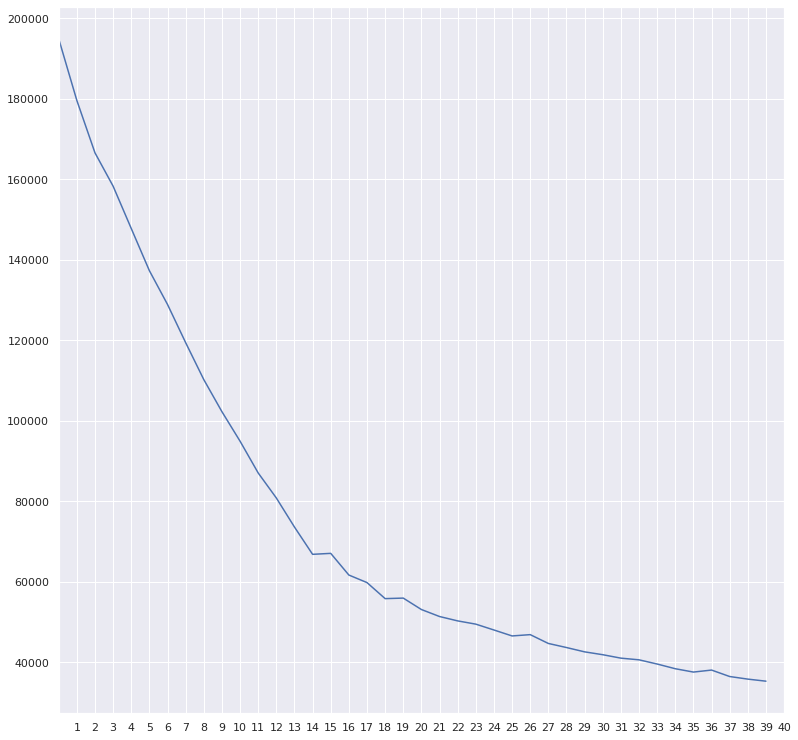

In [0]:
#Como saber qual a melhor taxa de erro com o melhor número de clusters a se usa
#Elbow Method
resultado.inertia.plot(xticks=resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd00c005f60>,
      dtype=object)

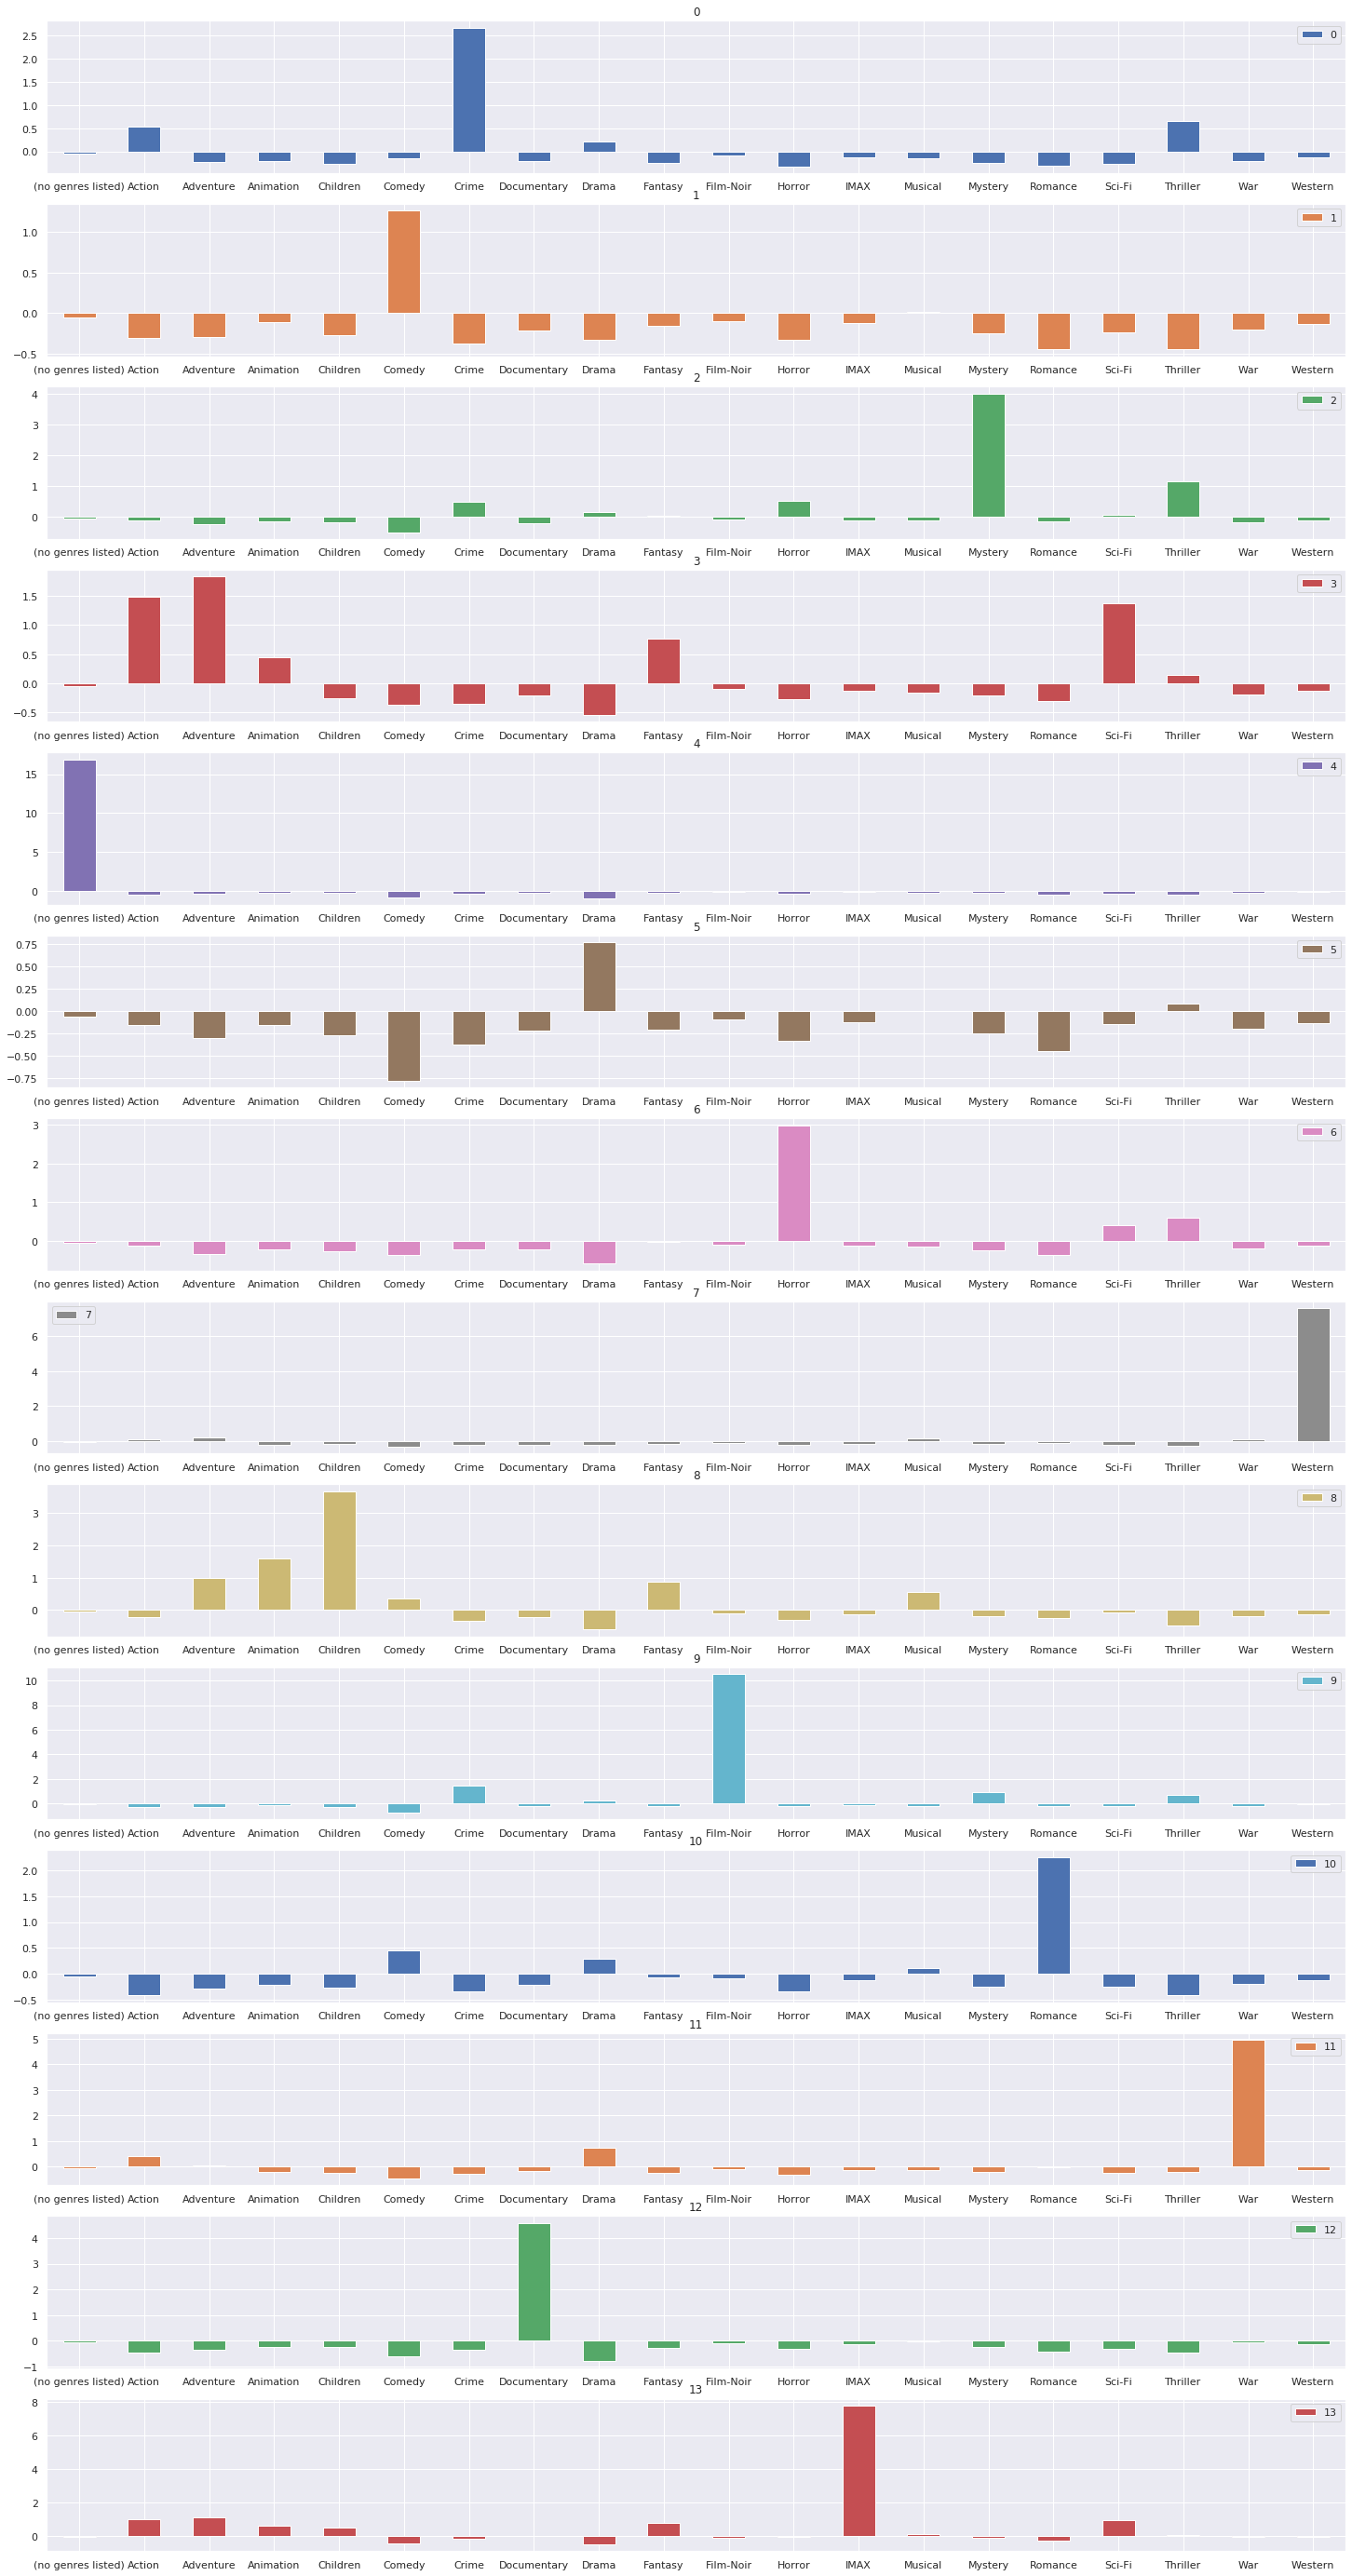

In [0]:
modelo = KMeans(n_clusters=14)
modelo.fit(generos_escalados)
grupos = pd.DataFrame(modelo.cluster_centers_,
             columns=generos.columns)
grupos.transpose().plot.bar(subplots=True,
                figsize=(25,50),
                sharex=False,
                rot=0)

In [0]:
grupo = 0

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3263,4410,Something Wild (1986),Comedy|Crime|Drama,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
6045,40148,Revolver (2005),Crime|Drama|Thriller,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
9263,156706,The Trust (2016),Crime|Thriller,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
8235,104211,We're the Millers (2013),Comedy|Crime,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
102,117,"Young Poisoner's Handbook, The (1995)",Crime|Drama,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1572,2110,Dead Men Don't Wear Plaid (1982),Comedy|Crime|Thriller,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
8968,137345,That Demon Within (2014),Crime|Thriller,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1683,2264,We're No Angels (1989),Comedy|Crime,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2687,3598,Hamlet (2000),Crime|Drama|Romance|Thriller,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
4139,5954,25th Hour (2002),Crime|Drama,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [0]:
grupo = 8

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
782,1024,"Three Caballeros, The (1945)",Animation|Children|Musical,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4900,7345,Agent Cody Banks 2: Destination London (2004),Action|Adventure|Children|Comedy,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
109,126,"NeverEnding Story III, The (1994)",Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8715,125970,Halloweentown (1998),Adventure|Children|Comedy|Fantasy,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9585,175387,On the Trail of the Bremen Town Musicians (1973),Adventure|Animation|Children,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4915,7369,Scooby-Doo 2: Monsters Unleashed (2004),Action|Adventure|Children|Comedy|Mystery,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1302,1739,3 Ninjas: High Noon On Mega Mountain (1998),Action|Children|Comedy,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
780,1022,Cinderella (1950),Animation|Children|Fantasy|Musical|Romance,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1599,2141,"American Tail, An (1986)",Adventure|Animation|Children|Comedy,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#Agrupamento patrocinado
from sklearn.cluster import AgglomerativeClustering

In [0]:
modelo = AgglomerativeClustering(n_clusters=14)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5,  0, 13, ...,  2,  5,  2])

In [0]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-22.11153  ,  -5.467172 ],
       [-53.873947 ,   9.794367 ],
       [ 23.960447 , -36.368996 ],
       ...,
       [ -3.8934495,   6.951817 ],
       [-26.70562  ,  38.187397 ],
       [ -4.819263 , -35.920704 ]], dtype=float32)

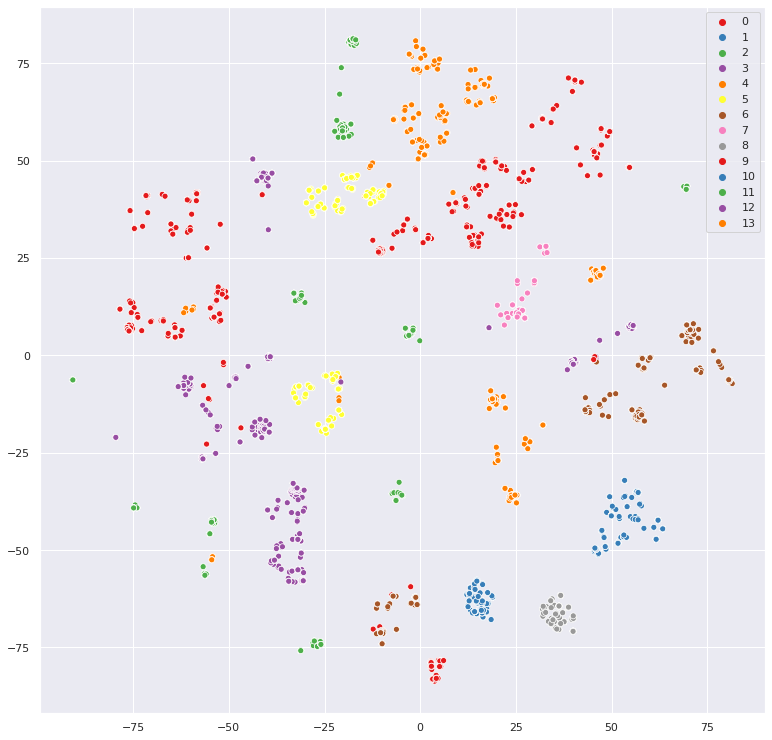

In [0]:
sns.scatterplot(x=visualizacao[:, 0],
                y=visualizacao[:,1],
                hue=grupos,
                palette=sns.color_palette('Set1', 14))

In [0]:
#Dendograma (hierárquico)
from scipy.cluster.hierarchy import dendrogram, linkage

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd00b59cba8>,
      dtype=object)

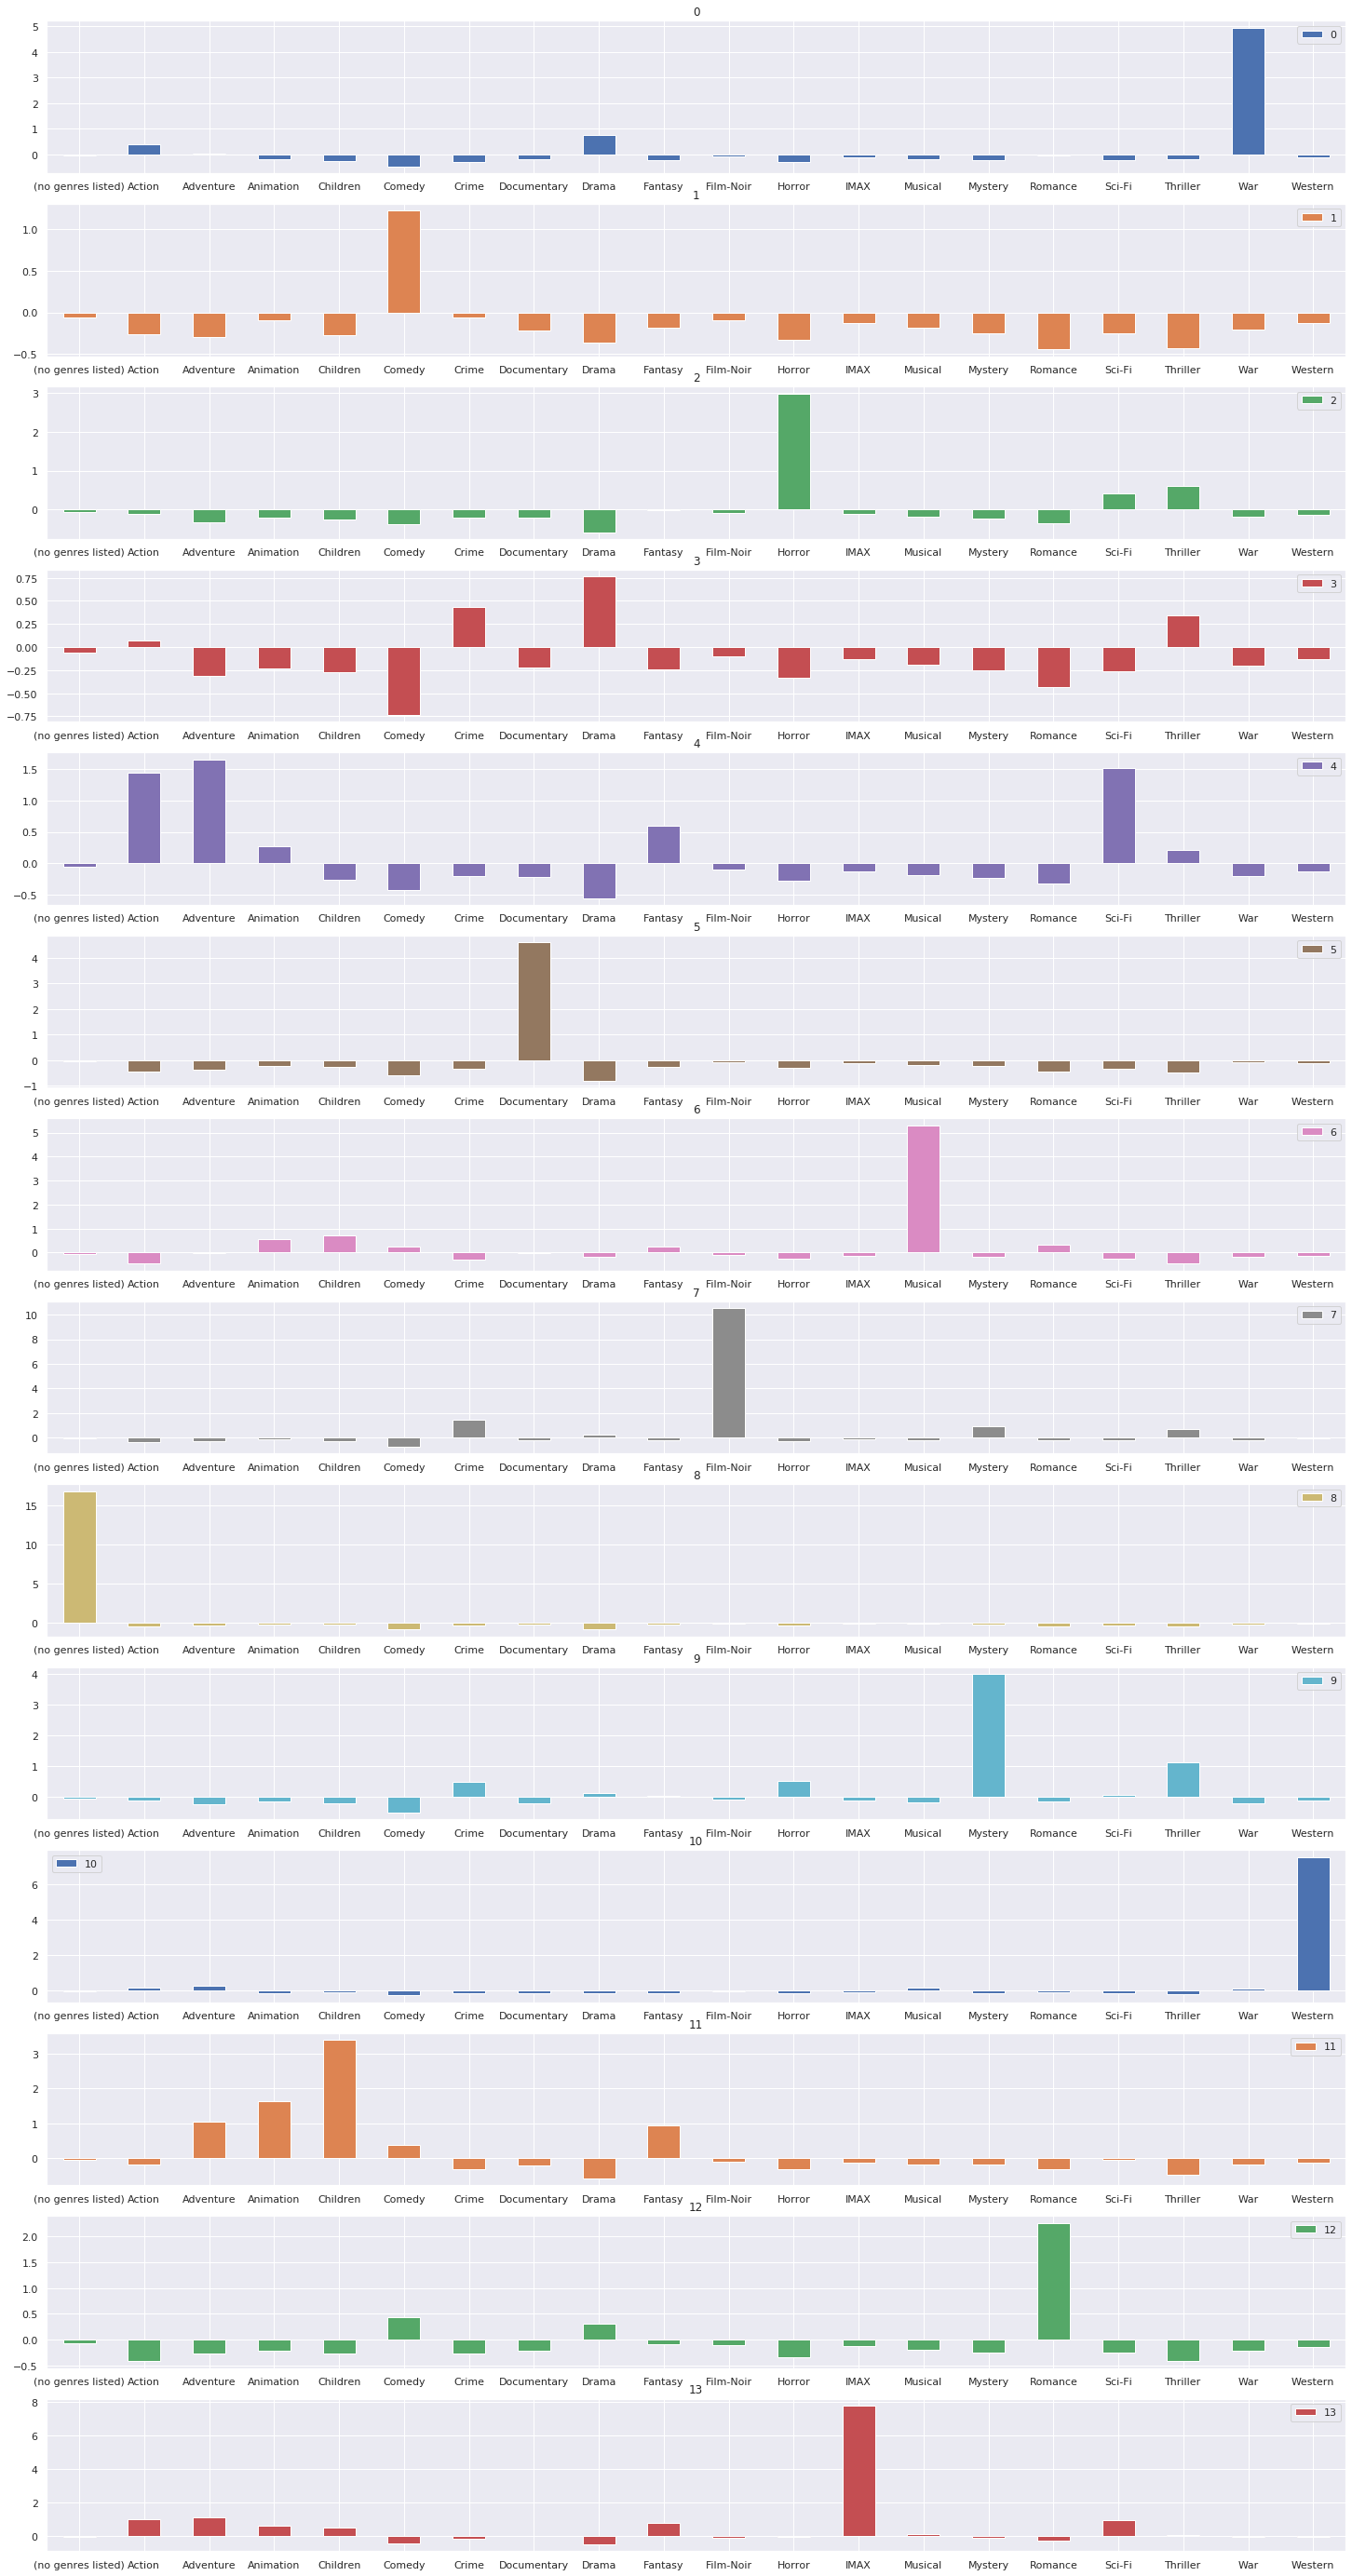

In [0]:
modelo = KMeans(n_clusters=14)
modelo.fit(generos_escalados)
grupos = pd.DataFrame(modelo.cluster_centers_,
             columns=generos.columns)
grupos.transpose().plot.bar(subplots=True,
                figsize=(25,50),
                sharex=False,
                rot=0)

In [0]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 1.        ,  3.        ,  2.47025399,  2.        ],
       [12.        , 14.        ,  2.90860114,  3.        ],
       [ 4.        , 15.        ,  3.49029675,  4.        ],
       [ 2.        , 16.        ,  3.74903884,  5.        ],
       [ 9.        , 17.        ,  4.49005765,  6.        ],
       [11.        , 18.        ,  4.51186073,  7.        ],
       [ 5.        , 19.        ,  5.18616526,  8.        ],
       [ 0.        , 20.        ,  5.27477741,  9.        ],
       [ 6.        , 21.        ,  5.79690627, 10.        ],
       [10.        , 22.        ,  7.86593452, 11.        ],
       [13.        , 23.        ,  8.02569943, 12.        ],
       [ 7.        , 24.        , 10.77021286, 13.        ],
       [ 8.        , 25.        , 17.08738551, 14.        ]])

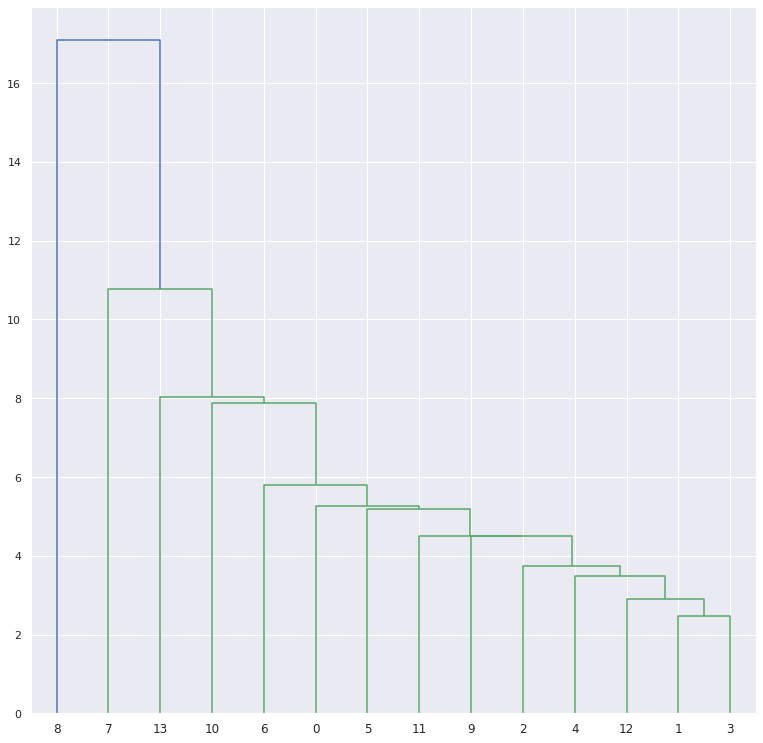

In [0]:
dendrograma = dendrogram(matriz_de_distancia)